# 加载数据

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

root_path = r'D:\github\models\kaggle\titanic\data'
train = pd.read_csv('%s/%s' % (root_path, 'train.csv'))
test = pd.read_csv('%s/%s' % (root_path, 'test.csv'))

# 特征详情

In [4]:
train.head(5)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
# 返回数值型变量的统计量
# train.describe(percentiles=[0.00, 0.25, 0.5, 0.75, 1.00])
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# 存活人数
train['Survived'].value_counts()

# 特征分析
## 相关性协方差表

In [ ]:
train_corr = train.drop('PassengerId', axis=1).corr()
a = plt.subplots(figsize=(15,9))
a = sns.heatmap(train_corr, vmin=-1, vmax=1, annot=True, square=True)

## 各个数据与结果的关系
1. Pclass, 乘客等级，1最高

In [11]:
train.groupby(['Pclass'])['Pclass','Survived'].mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


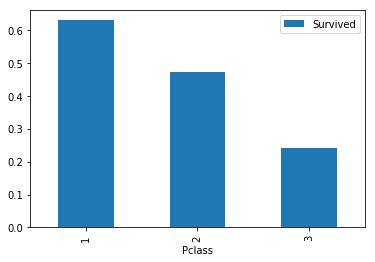

In [12]:
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

结果说明不同票类别，存活率不一样
2. Sex, 性别

In [ ]:
train.groupby(['Sex'])['Sex','Survived'].mean()

In [ ]:
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar()

结果分析:女性有更高的活下来的概率（74%）,保留该特征
3. SibSp Parch, 兄妹配偶  父母子女

In [23]:
train.groupby(['SibSp'])['SibSp','Survived'].mean()

,SibSp,Survived
SibSp,,
0,0.0,0.345395
1,1.0,0.535885
2,2.0,0.464286
3,3.0,0.250000
4,4.0,0.166667
5,5.0,0.000000
8,8.0,0.000000


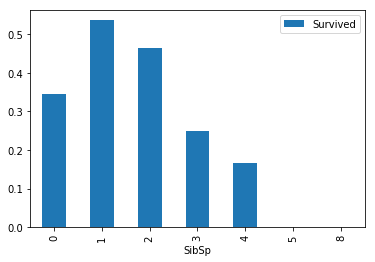

In [22]:
train[['SibSp','Survived']].groupby(['SibSp']).mean().plot.bar()

In [21]:
train.groupby(['SibSp'])['Parch','Survived'].mean()

,Parch,Survived
SibSp,,
0,0.185855,0.345395
1,0.655502,0.535885
2,0.642857,0.464286
3,1.312500,0.250000
4,1.500000,0.166667
5,2.000000,0.000000
8,2.000000,0.000000


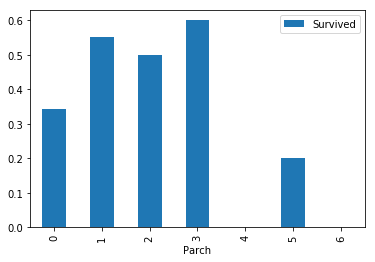

In [20]:
train[['Parch','Survived']].groupby(['Parch']).mean().plot.bar()

结果分析:这些特征与特定的值没有相关性不明显，最好是由这些独立的特征派生出一个新特征或者一组新特征
4. Age年龄与生存情况的分析.

F:\anaconda3.7\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


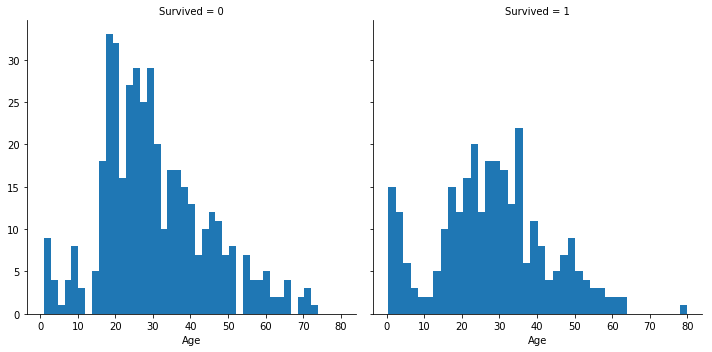

In [25]:
g = sns.FacetGrid(train, col='Survived', size=5)
g.map(plt.hist, 'Age', bins=40)

由图,可以看到年龄是影响生存情况的.
5. Embarked登港港口与生存情况的分析

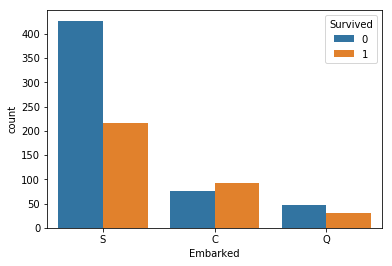

In [26]:
sns.countplot('Embarked', hue='Survived', data=train)

# 特征工程 

In [2]:
#先将数据集合并,一起做特征工程(注意,标准化的时候需要分开处理)
#先将test补齐,然后通过pd.apped()合并
test['Survived'] = 0
train_test = train.append(test,sort=False)

1. Pclass,乘客等级,1是最高级

In [3]:
# 离散变量分列处理
train_test = pd.get_dummies(train_test,columns=['Pclass'])

2. Sex,性别 无缺失值,直接分列

In [4]:
# 离散变量分列处理
train_test = pd.get_dummies(train_test,columns=['Sex'])

3. SibSp and Parch 兄妹配偶数/父母子女数
第一次直接保留:这两个都影响生存率,且都是数值型,先直接保存.
第二次进行两项求和,并进行分列处理.(兄妹配偶数和父母子女数都是认识人的数量,所以总数可能也会更好)(模型结果提高到了)

In [5]:
train_test['SibSp_Parch'] = train_test['SibSp'] + train_test['Parch']
train_test = pd.get_dummies(train_test,columns = ['SibSp','Parch','SibSp_Parch'])

4. Embarked 数据有极少量(3个)缺失值,但是在分列的时候,缺失值的所有列可以均为0,所以可以考虑不填充.
另外,也可以考虑用测试集众数来填充.先找出众数,再采用df.fillna()方法

In [6]:
train_test = pd.get_dummies(train_test,columns=["Embarked"])

5. Name

In [7]:
# 在数据的Name项中包含了对该乘客的称呼,将这些关键词提取出来,然后做分列处理
train_test['Name1'] = train_test['Name'].str.extract('.+,(.+)', expand=False).str.extract('^(.+?)\.', expand=False).str.strip()
train_test = pd.get_dummies(train_test,columns=['Name1'])

In [8]:
#从姓名中提取出姓
train_test['Name2'] = train_test['Name'].apply(lambda x: x.split('.')[1])

In [9]:
#计算数量,然后合并数据集
Name2_sum = train_test['Name2'].value_counts().reset_index()
Name2_sum.columns=['Name2','Name2_sum']
train_test = pd.merge(train_test,Name2_sum,how='left',on='Name2')

In [10]:
#由于出现一次时该特征时无效特征,用one来代替出现一次的姓
train_test.loc[train_test['Name2_sum'] == 1 , 'Name2_new'] = 'one'
train_test.loc[train_test['Name2_sum'] > 1 , 'Name2_new'] = train_test['Name2']
del train_test['Name2']
#分列处理
train_test = pd.get_dummies(train_test,columns=['Name2_new'])
#删掉姓名这个特征
del train_test['Name']

6. Fare, 该特征有缺失值,先找出缺失值的那调数据,然后用平均数填充

In [11]:
#从上面的分析,发现该特征train集无miss值,test有一个缺失值,先查看
train_test.loc[train_test["Fare"].isnull()]

,PassengerId,Survived,Age,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Name2_new_ Thomas Henry,Name2_new_ Victor,Name2_new_ Washington,Name2_new_ William,Name2_new_ William Edward,Name2_new_ William Henry,Name2_new_ William James,Name2_new_ William John,Name2_new_ William Thomas,Name2_new_one
1043,1044,0,60.5,3701,NaN,NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
#票价与pclass和Embarked有关,所以用train分组后的平均数填充
train.groupby(by=["Pclass","Embarked"]).Fare.mean()
#用pclass=3和Embarked=S的平均数14.644083来填充
train_test["Fare"].fillna(14.435422,inplace=True)

7. Ticket, 该列和名字做类似的处理,先提取,然后分列

In [13]:
#将Ticket提取字符列
#str.isnumeric()  如果S中只有数字字符，则返回True，否则返回False
train_test['Ticket_Letter'] = train_test['Ticket'].str.split().str[0]
train_test['Ticket_Letter'] = train_test['Ticket_Letter'].apply(lambda x:np.nan if x.isnumeric() else x)
train_test.drop('Ticket',inplace=True,axis=1)

In [14]:
#分列,此时nan值可以不做处理
train_test = pd.get_dummies(train_test,columns=['Ticket_Letter'],drop_first=True)

8. Age
该列有大量缺失值,考虑用一个回归模型进行填充.
在模型修改的时候,考虑到年龄缺失值可能影响死亡情况,用年龄是否缺失值来构造新特征

In [15]:
# 所以用年龄是否缺失值来构造新特征
train_test.loc[train_test["Age"].isnull() ,"age_nan"] = 1
train_test.loc[train_test["Age"].notnull() ,"age_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['age_nan'])

In [16]:
#创建没有['Age','Survived']的数据集
missing_age = train_test.drop(['Survived','Cabin','PassengerId'],axis=1)
#将Age完整的项作为训练集、将Age缺失的项作为测试集。
missing_age_train = missing_age[missing_age['Age'].notnull()]
missing_age_test = missing_age[missing_age['Age'].isnull()]

In [17]:
#构建训练集合预测集的X和Y值
missing_age_X_train = missing_age_train.drop(['Age'], axis=1)
missing_age_Y_train = missing_age_train['Age']
missing_age_X_test = missing_age_test.drop(['Age'], axis=1)

In [18]:
# 先将数据标准化
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
#用训练集训练并标准化
ss.fit(missing_age_X_train)
missing_age_X_train = ss.transform(missing_age_X_train)
missing_age_X_test = ss.transform(missing_age_X_test)

In [19]:
#使用贝叶斯预测年龄
from sklearn import linear_model
lin = linear_model.BayesianRidge()
lin.fit(missing_age_X_train,missing_age_Y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

In [20]:
#利用loc将预测值填入数据集
train_test.loc[(train_test['Age'].isnull()), 'Age'] = lin.predict(missing_age_X_test)

In [21]:
#将年龄划分是个阶段10以下,10-18,18-30,30-50,50以上
train_test['Age'] = pd.cut(train_test['Age'], bins=[0,10,18,30,50,100],labels=[1,2,3,4,5])
train_test = pd.get_dummies(train_test,columns=['Age'])

9. Cabin
cabin项缺失太多，只能将有无Cain首字母进行分类,缺失值为一类,作为特征值进行建模,也可以考虑直接舍去该特征

In [22]:
train_test['Cabin_nan'] = train_test['Cabin'].apply(lambda x:str(x)[0] if pd.notnull(x) else x)
train_test = pd.get_dummies(train_test,columns=['Cabin_nan'])

In [23]:
#cabin项缺失太多，只能将有无Cain首字母进行分类,
train_test.loc[train_test["Cabin"].isnull() ,"Cabin_nan"] = 1
train_test.loc[train_test["Cabin"].notnull() ,"Cabin_nan"] = 0
train_test = pd.get_dummies(train_test,columns=['Cabin_nan'])
train_test.drop('Cabin',axis=1,inplace=True)

10. 特征工程处理完了,划分数据集

In [24]:
train_test = train_test.drop(['PassengerId'], axis=1)
train_data = train_test[:891]
test_data = train_test[891:]
train_data_X = train_data.drop(['Survived'],axis=1)
train_data_Y = train_data['Survived'].astype('int32')
test_data_X = test_data.drop(['Survived'],axis=1)

# 数据规约
1. 线性模型需要用标准化的数据建模,而树类模型不需要标准化的数据
2. 处理标准化的时候,注意将测试集的数据transform到test集上

In [25]:
from sklearn.preprocessing import StandardScaler
ss2 = StandardScaler()
ss2.fit(train_data_X)
train_data_X_sd = ss2.transform(train_data_X)
test_data_X_sd = ss2.transform(test_data_X)

# 建立模型
## 模型发现
1. 可选单个模型模型有随机森林,逻辑回归,svm,xgboost,gbdt等.
2. 也可以将多个模型组合起来,进行模型融合,比如voting,stacking等方法
3. 好的特征决定模型上限,好的模型和参数可以无限逼近上限.
4. 我测试了多种模型,模型结果最高的随机森林,最高有0.8.
## 构建模型

In [38]:
from sklearn.model_selection import GridSearchCV
def gridsearch(clf, param_dist):
    gsv = GridSearchCV(clf, param_dist, cv=5)
    # gsv.fit(train_data_X_sd, train_data_Y)
    gsv.fit(train_data_X, train_data_Y)
    print(gsv.best_score_)
    print(gsv.best_params_)
    return gsv.best_estimator_
def predict(clf, name):
    #clf.fit(train_data_X_sd, train_data_Y)
    clf.fit(train_data_X, train_data_Y)
    test["Survived"] = clf.predict(test_data_X)
    test[['PassengerId','Survived']].set_index('PassengerId').to_csv(root_path+'/../%s.csv'%name)

1. 随机森林

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
param_dist = {"max_depth": [8, 10],
              "min_samples_leaf":[2, 4],
              "max_features": [8, 10],
              "criterion": ["gini", "entropy"]}
rf = gridsearch(rf, param_dist)
# predict(rf, "rf")

0.8226711560044894
{'criterion': 'gini', 'max_depth': 8, 'max_features': 8, 'min_samples_leaf': 2}


2. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear')
param_dist = {'C':[0.001,0.01,0.1,1,10], "max_iter":[100,250]}
lr = gridsearch(lr, param_dist)
# predict(lr, 'lr')

0.8170594837261503
{'C': 1, 'max_iter': 100}


3. GBDT

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbdt = GradientBoostingClassifier(n_estimators=100)
param_dist = {"learning_rate":[0.01, 0.05, 0.1],
              "max_depth": [6, 8, 10],
              "min_samples_leaf":[2, 4, 8],
              }
gbdt = gridsearch(gbdt, param_dist) 

0.835016835016835
{'learning_rate': 0.05, 'max_depth': 8, 'min_samples_leaf': 4}


4. XGboost

In [ ]:
import xgboost 
xgb = xgboost.XGBClassifier(n_estimators=100,num_round = 5)
param_dist = {"learning_rate":[0.001, 0.005, 0.01],
              "max_depth": [6, 8, 10],
              "min_samples_leaf":[2, 4],
              }
xgb = gridsearch(xgb, param_dist) 

5. KNN

In [50]:
from sklearn import neighbors 
knn = neighbors.KNeighborsClassifier()
param_dist = {"n_neighbors":[5, 10, 15],
              "p":[1, 2]}
knn = gridsearch(knn, param_dist) 


0.7789001122334456
{'n_neighbors': 10, 'p': 1}


6. Voting

In [51]:
from sklearn.ensemble import VotingClassifier

vot = VotingClassifier(estimators=[('lr', lr), ('rf', rf),('gbdt',gbdt),('xgb',xgb)], voting='soft')
lr.fit(train_data_X, train_data_Y)
rf.fit(train_data_X, train_data_Y)
gbdt.fit(train_data_X, train_data_Y)
xgb.fit(train_data_X, train_data_Y)
predict(vot, "voting")

7. Stacking

In [64]:
from sklearn.model_selection import KFold
nfold = 5
ntrain = train_data_X.shape[0]
ntest = test_data_X.shape[0]
kf = KFold(n_splits=nfold, random_state=0)
def get_oof(clf):
    ''' 返回模型在每个fold上的预测值以及在测试数据集上的平均预测值'''
    oof_train = np.zeros((ntrain,)) # 保存每一折的模型在留下的一折的预测值
    oof_test_skf = np.empty((nfold, ntest))# 保存每一折模型在test集的预测结果
    for i, (train_index, test_index) in enumerate(kf.split(train_data_X)):
        kf_X_train = train_data_X.iloc[train_index]
        kf_Y_train = train_data_Y.iloc[train_index]
        kf_X_test = train_data_X.iloc[test_index]
        
        clf.fit(kf_X_train, kf_Y_train)
        oof_train[test_index] = clf.predict(kf_X_test)
        oof_test_skf[i, :] = clf.predict(test_data_X)
    oof_test = oof_test_skf.mean(axis=0)
    return oof_train, oof_test

In [65]:
# 第一层模型
clfs = [lr, rf, gbdt, xgb]
new_train = np.zeros((ntrain, len(clfs)))
new_test = np.zeros((ntest, len(clfs)))
for i, clf in enumerate(clfs):
    new_train[:,i], new_test[:,i] = get_oof(clf)

In [72]:
# 第二层模型
clf2 = LogisticRegression(C=0.1, max_iter=100)
clf2.fit(new_train, train_data_Y)
test["Survived"] = clf2.predict(new_test)
test[['PassengerId','Survived']].set_index('PassengerId').to_csv(root_path+'/../stacking.csv')

F:\anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [99]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
   
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [117]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)
#create table to compare MLA predictions
MLA_predict = {}

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, train_data_X,train_data_Y, cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(train_data_X,train_data_Y)
    MLA_predict[MLA_name] = alg.predict(test_data_X)
    
    row_index+=1

F:\anaconda3.7\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
F:\anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
F:\anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
F:\anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
F:\anaconda3.7\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergen

ValueError: feature_names must be unique

In [118]:
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare

,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
8,RidgeClassifierCV,"{'alphas': array([ 0.1, 1. , 10. ]), 'class_w...",0.827612,0.0614755,0.0800512
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': 'warn',...",0.817537,0.0721038,4.59476
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.813806,0.0628164,0.327697
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.798134,0.0628164,0.250645
19,LinearDiscriminantAnalysis,"{'n_components': None, 'priors': None, 'shrink...",0.797388,0.0557571,0.102436
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",0.795149,0.0759958,0.0378773
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.794776,0.0543804,0.091343
11,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.789552,0.0801292,0.0172903
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",0.785821,0.0586379,0.0420738
17,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",0.749254,0.0716418,0.0329794


Text(0, 0.5, 'Algorithm')

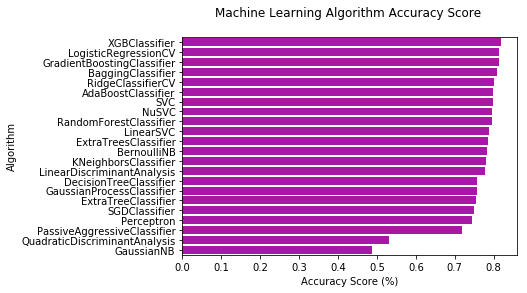

In [115]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

In [120]:
train_data_X.describe()


,PassengerId,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Cabin_nan_A,Cabin_nan_B,Cabin_nan_C,Cabin_nan_D,Cabin_nan_E,Cabin_nan_F,Cabin_nan_G,Cabin_nan_T,Cabin_nan_0.0,Cabin_nan_1.0
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,32.204208,0.242424,0.206510,0.551066,0.352413,0.647587,0.682379,0.234568,0.031425,...,0.016835,0.052750,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.228956,0.771044
std,257.353842,49.693429,0.428790,0.405028,0.497665,0.477990,0.477990,0.465813,0.423966,0.174562,...,0.128725,0.223659,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397,0.420397
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,446.000000,14.454200,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,668.500000,31.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,891.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
